In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (10, 5)
sns.set_style("dark")

In [3]:
doge_df = pd.read_csv('../datasets/coin_Dogecoin.csv')
doge_df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Dogecoin,DOGE,2013-12-16 23:59:59,0.000866,0.000150,0.000299,0.000205,0.0,1.509085e+06
1,2,Dogecoin,DOGE,2013-12-17 23:59:59,0.000289,0.000116,0.000207,0.000269,0.0,2.169688e+06
2,3,Dogecoin,DOGE,2013-12-18 23:59:59,0.000362,0.000205,0.000267,0.000362,0.0,3.188943e+06
3,4,Dogecoin,DOGE,2013-12-19 23:59:59,0.001520,0.000328,0.000395,0.001162,0.0,1.115034e+07
4,5,Dogecoin,DOGE,2013-12-20 23:59:59,0.001143,0.000662,0.001143,0.000704,0.0,7.284337e+06


In [4]:
doge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2760 entries, 0 to 2759
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2760 non-null   int64  
 1   Name       2760 non-null   object 
 2   Symbol     2760 non-null   object 
 3   Date       2760 non-null   object 
 4   High       2760 non-null   float64
 5   Low        2760 non-null   float64
 6   Open       2760 non-null   float64
 7   Close      2760 non-null   float64
 8   Volume     2760 non-null   float64
 9   Marketcap  2760 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 215.8+ KB


<Axes: ylabel='Close'>

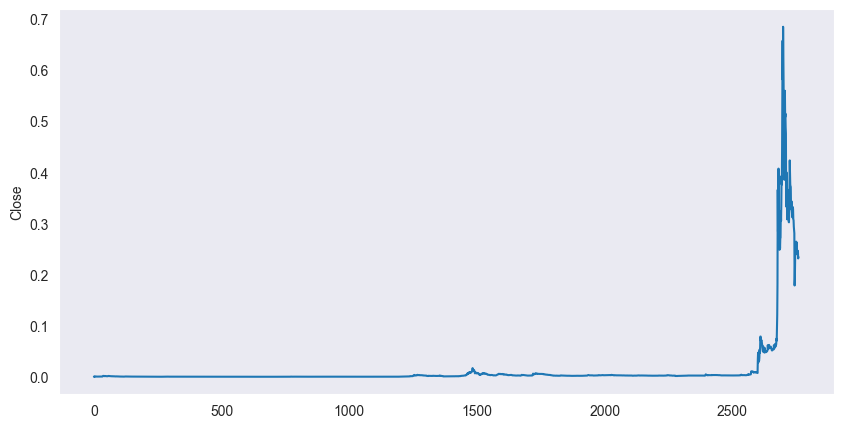

In [5]:
sns.lineplot(doge_df, x=doge_df.index, y=doge_df['Close'])

In [6]:
doge_heatmap_df = doge_df[['High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']]
doge_heatmap_df.head()

,High,Low,Open,Close,Volume,Marketcap
0,0.000866,0.000150,0.000299,0.000205,0.0,1.509085e+06
1,0.000289,0.000116,0.000207,0.000269,0.0,2.169688e+06
2,0.000362,0.000205,0.000267,0.000362,0.0,3.188943e+06
3,0.001520,0.000328,0.000395,0.001162,0.0,1.115034e+07
4,0.001143,0.000662,0.001143,0.000704,0.0,7.284337e+06


<Axes: >

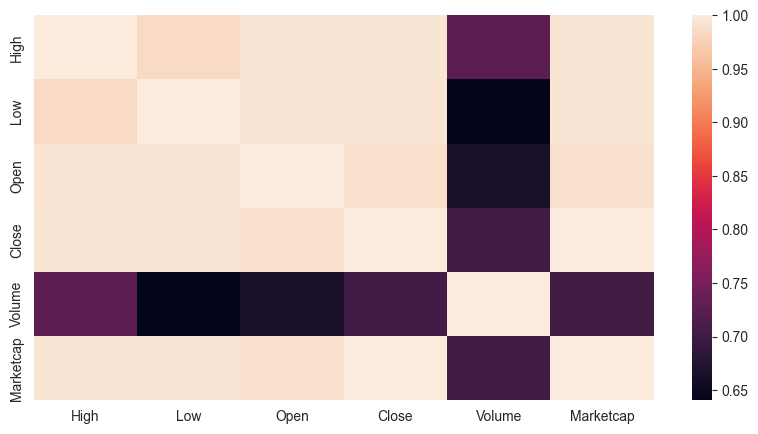

In [7]:
sns.heatmap(doge_heatmap_df.corr())

In [8]:
doge_df.drop(['Volume', 'Name', 'Symbol', 'Date'], axis=1, inplace=True)
doge_df.head()

,SNo,High,Low,Open,Close,Marketcap
0,1,0.000866,0.000150,0.000299,0.000205,1.509085e+06
1,2,0.000289,0.000116,0.000207,0.000269,2.169688e+06
2,3,0.000362,0.000205,0.000267,0.000362,3.188943e+06
3,4,0.001520,0.000328,0.000395,0.001162,1.115034e+07
4,5,0.001143,0.000662,0.001143,0.000704,7.284337e+06


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_df = doge_df.drop('Close', axis=1)
y_df = doge_df['Close']
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.3, random_state=200)

In [11]:
print(X_train.shape, y_train.shape)

(1932, 5) (1932,)


In [12]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred =  linear_regressor.predict(X_test)
# print(y_pred)

In [14]:
print(linear_regressor.coef_)

[ 2.69417228e-08  3.03453846e-02  3.35887842e-03 -1.30686069e-02
  7.53061502e-12]


In [15]:
print(linear_regressor.intercept_)

0.00015287583699405242


In [16]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9999486291396914

In [17]:
X_test_pred = pd.DataFrame(X_test)

In [18]:
X_test_pred['Close'] = np.array(y_pred)

In [19]:
X_test_pred['Close1'] = np.array(y_test)
X_test_pred.head()

,SNo,High,Low,Open,Marketcap,Close,Close1
2126,2127,0.002383,0.002310,0.002328,2.845180e+08,0.002402,0.002340
2012,2013,0.003204,0.003095,0.003143,3.793201e+08,0.003130,0.003161
1189,1190,0.000240,0.000215,0.000219,2.553062e+07,0.000382,0.000235
636,637,0.000129,0.000123,0.000127,1.270264e+07,0.000268,0.000126
560,561,0.000216,0.000203,0.000203,2.135260e+07,0.000333,0.000214


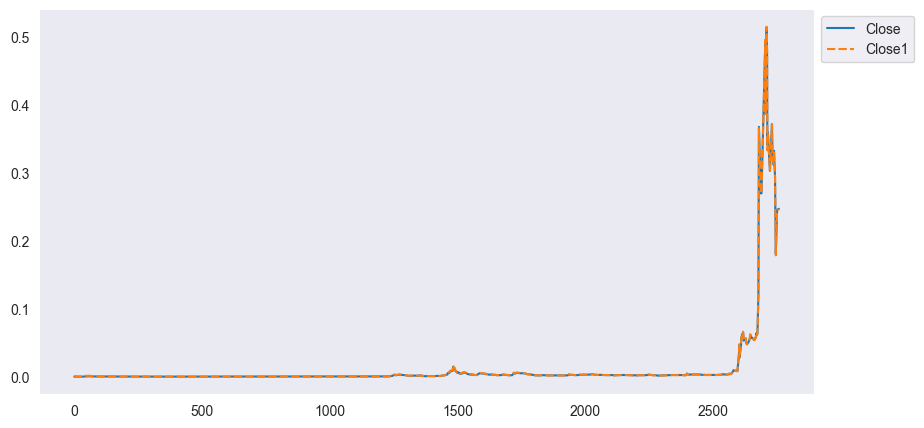

In [27]:
sns.lineplot(data=X_test_pred[['Close', 'Close1']])
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')